# **WEEK 7**
# ASSIGNMENT: Implement a Markov chain working with whole words instead of letters.*italicised text*


In [50]:
import re
from collections import defaultdict
from scipy.sparse import dok_matrix

def tokenize(text):
    # Tokenizes the input text into words
    return re.findall(r'\b\w+\b', text.lower())

def build_markov_chain(text, k=2):
    words = tokenize(text)
    index = {word: i for i, word in enumerate(set(words))}
    size = len(index)

    # Initialize the sparse matrix
    markov_chain = dok_matrix((size, size), dtype=float)

    for i in range(len(words) - k + 1):
        word_seq = words[i:i + k]
        if len(word_seq) == k:
            markov_chain[index[word_seq[0]], index[word_seq[1]]] += 1

    # Normalize the matrix
    for i in range(size):
        total = sum(markov_chain[i, j] for j in range(size))
        if total > 0:
            markov_chain[i, :] /= total

    return markov_chain, index

# Example usage
with open('/content/text (2).txt', 'r', encoding='utf8') as file:
    text = file.read()

markov_chain, index = build_markov_chain(text)

print(markov_chain, index)
# Now you can use `markov_chain` as your Markov model


  (125, 70)	0.027777777777777776
  (70, 53)	1.0
  (53, 200)	0.2
  (200, 127)	1.0
  (127, 125)	0.5
  (125, 12)	0.027777777777777776
  (12, 196)	1.0
  (196, 144)	1.0
  (144, 40)	0.04
  (40, 71)	1.0
  (71, 179)	0.09090909090909091
  (179, 125)	1.0
  (125, 73)	0.027777777777777776
  (73, 1)	1.0
  (1, 176)	1.0
  (176, 62)	1.0
  (62, 192)	1.0
  (192, 125)	1.0
  (125, 79)	0.027777777777777776
  (79, 144)	1.0
  (144, 125)	0.36
  (125, 41)	0.027777777777777776
  (41, 113)	1.0
  (113, 189)	0.5
  (189, 95)	1.0
  :	:
  (25, 136)	0.16666666666666666
  (136, 63)	1.0
  (63, 25)	1.0
  (25, 155)	0.16666666666666666
  (155, 17)	1.0
  (17, 125)	1.0
  (125, 191)	0.027777777777777776
  (191, 90)	1.0
  (90, 159)	0.25
  (159, 49)	1.0
  (49, 34)	0.16666666666666666
  (34, 111)	1.0
  (111, 174)	0.14285714285714285
  (174, 130)	1.0
  (130, 25)	1.0
  (25, 55)	0.16666666666666666
  (55, 181)	1.0
  (181, 167)	0.3333333333333333
  (167, 94)	1.0
  (94, 69)	1.0
  (69, 124)	0.5
  (49, 85)	0.16666666666666666
  (85, 49

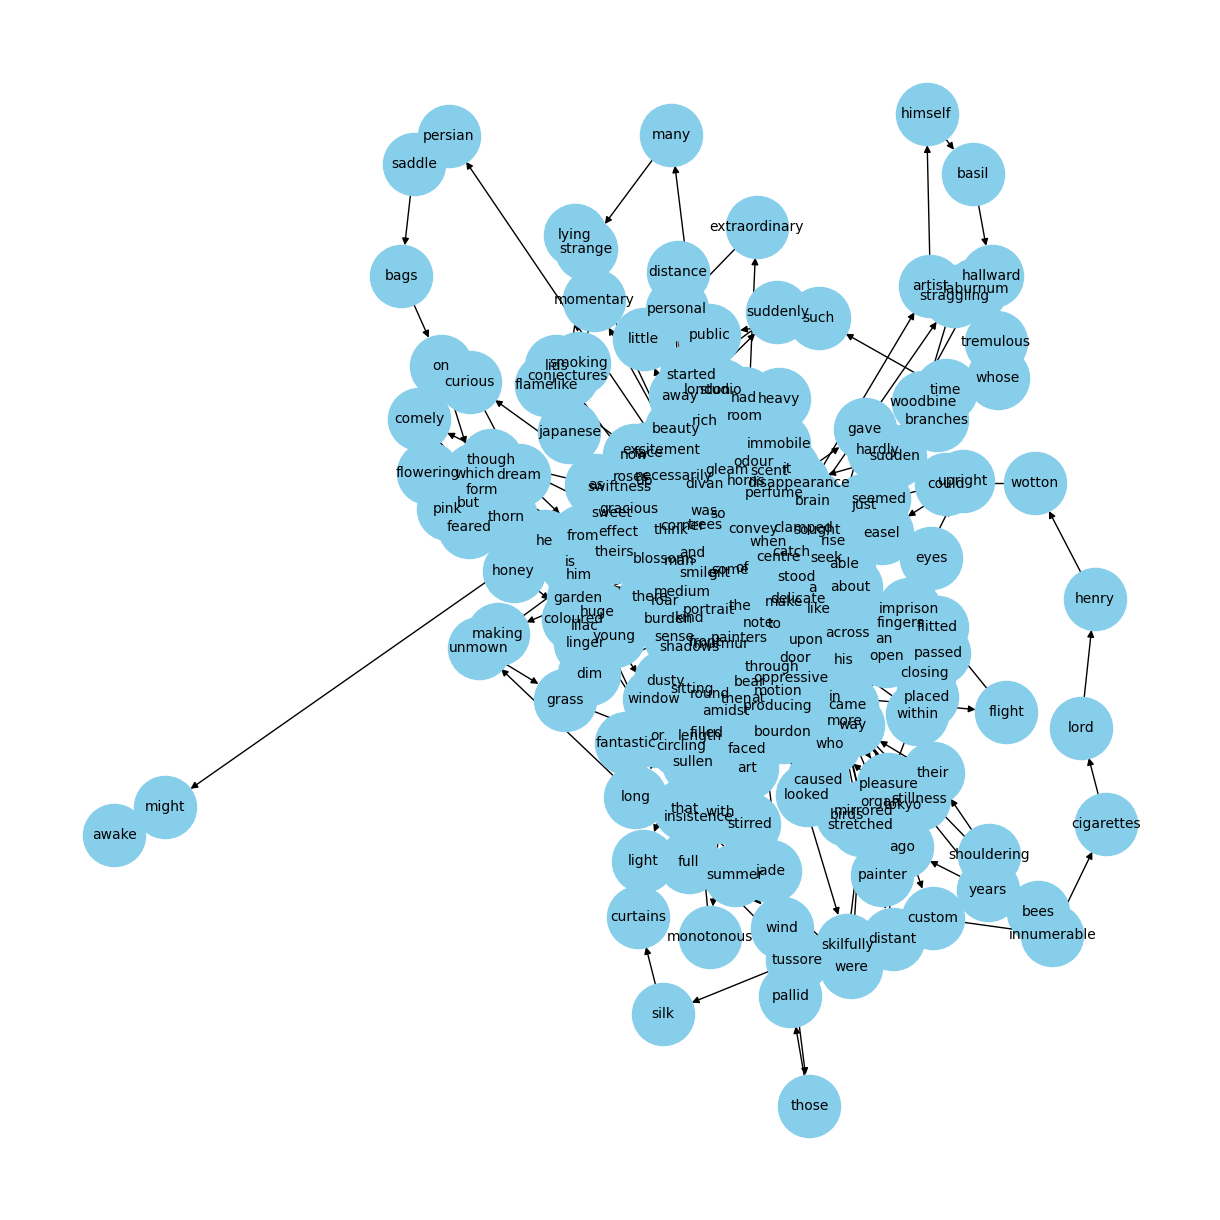

In [51]:
import networkx as nx

def create_markov_graph(markov_chain, index):
    G = nx.DiGraph()
    for word, idx in index.items():
        G.add_node(word)

    for i in range(markov_chain.shape[0]):
        for j in range(markov_chain.shape[1]):
            if markov_chain[i, j] > 0:
                word_i = list(index.keys())[list(index.values()).index(i)]
                word_j = list(index.keys())[list(index.values()).index(j)]
                G.add_edge(word_i, word_j, weight=markov_chain[i, j])

    return G

# Create the graph
G = create_markov_graph(markov_chain, index)

# Draw the graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.1)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=10)
plt.show()
